<a href="https://colab.research.google.com/github/codewithlax/Deep-Neural-Networks/blob/main/Churn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [ ]:
# Import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Divide the dataset into independent and dependent features:
X = dataset.iloc[:,3:13] # All the rows, but 3-12th column
y = dataset.iloc[:,13] # All rows, 13th column - can also do [:,-1]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# Feature Engineering:
geography = pd.get_dummies(X['Geography'],drop_first=True) # This basically does one hot encoding to the column. drop_first = True drops France as it can be identified when Germany and Spain are 0

In [ ]:
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
# Concactinate these variables with dataframe:
X=X.drop(['Geography','Gender'], axis=1)

In [ ]:
X = pd.concat([X,geography,gender], axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
# Train-test split:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# Implement ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialize ANN:
classifier = Sequential()

# Adding the input layer:
classifier.add(Dense(units=11,activation='relu'))

# Adding the first hidden layer:
classifier.add(Dense(units=7, activation='relu'))

# Adding the second hidden layer:
classifier.add(Dense(units=6, activation='relu'))

# Adding the outputlayer:
classifier.add(Dense(units=1, activation='sigmoid'))


In [ ]:
# If you want to have custom Learning Rate, do this:
# opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01) and pass opt in the below step

# Compiling all of the classifier. Note that the default L.R for adam is 0.001
classifier.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
# Early Stopping:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 8s 5ms/step - loss: 0.4953 - accuracy: 0.7987 - val_loss: 0.4509 - val_accuracy: 0.8031
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4215 - accuracy: 0.8138 - val_loss: 0.4134 - val_accuracy: 0.8092
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3908 - accuracy: 0.8190 - val_loss: 0.3949 - val_accuracy: 0.8145
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3749 - accuracy: 0.8207 - val_loss: 0.3856 - val_accuracy: 0.8183
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3655 - accuracy: 0.8304 - val_loss: 0.3823 - val_accuracy: 0.8398
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3593 - accuracy: 0.8468 - val_loss: 0.3785 - val_accuracy: 0.8444
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3552 - accuracy: 0.8535 - val_loss: 0.3751 - val_accuracy:

In [ ]:
model_history.history.keys()

Exception ignored in: <function _xla_gc_callback at 0x7f52768b5990>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

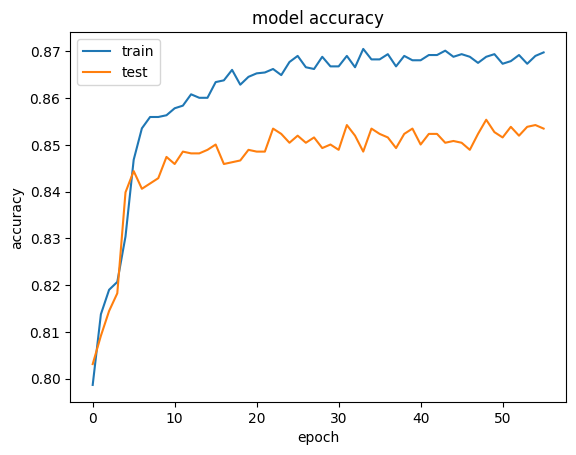

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

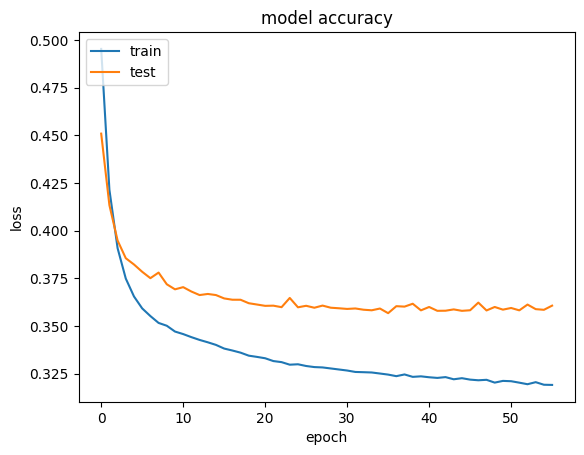

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Predict with test data
y_pred = classifier.predict(X_test)
# Check the values of y-pred (Remember, these will just be a value between 0 and 1 as we used sigmoid function)
y_pred


63/63 [==============================] - 0s 2ms/step


array([[0.32810432],
       [0.25194114],
       [0.12486096],
       ...,
       [0.19063613],
       [0.14521985],
       [0.24885395]], dtype=float32)

In [ ]:
y_pred = (y_pred >= 0.5)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1485,  110],
       [ 185,  220]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score


0.8525

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.67      0.54      0.60       405

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000



**--------------------Extras---------------------------**

In [ ]:
# To get the weights
classifier.get_weights()

[array([[-0.02463369,  0.00515651,  0.01629229,  0.24572687, -0.12922135,
         -0.3315648 , -0.01911113,  0.35968626, -0.19448902,  0.5238516 ,
         -0.40626526],
        [-0.19804014, -0.56659275,  0.06971914, -0.16780956,  0.6747123 ,
         -0.62114847,  0.7640677 ,  0.16586992, -0.9762876 , -0.7436811 ,
          0.12579983],
        [-0.05105504, -0.13070567,  0.13498826,  0.01012698, -0.02089897,
         -0.1325357 ,  0.1856092 , -0.06671444,  0.11210586,  0.1653581 ,
          0.01664273],
        [-0.5376708 ,  0.30288655,  0.07534674,  0.39372733,  0.3542265 ,
         -0.4548355 , -0.16344015,  0.4857763 ,  0.5223272 , -0.24459146,
          0.22953512],
        [ 0.65425825, -0.46483   ,  0.49941182, -0.3850084 ,  0.6503516 ,
         -0.42719558, -0.539929  ,  0.8466421 , -0.09771102, -0.34639117,
          1.0361197 ],
        [-0.279558  ,  0.10854461,  0.29554984,  0.14040531, -0.00851024,
          0.4092422 , -0.02936999,  0.1834163 , -0.28741944,  0.2037105

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
